# Описание тарифов
__Тариф «Смарт»__
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

__Тариф «Ультра»__
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

# Инструкция по выполнению проекта
__Шаг 1. Откройте файл с данными и изучите общую информацию__

Путь к файлам:
- /datasets/calls.csv.
- /datasets/internet.csv.
- /datasets/messages.csv.
- /datasets/tariffs.csv.
- /datasets/users.csv.

__Шаг 2. Подготовьте данные__
- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть.
- Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
- Посчитайте для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
  
__Шаг 3. Проанализируйте данные__

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

__Шаг 4. Проверьте гипотезы__
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
- Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

__Шаг 5. Напишите общий вывод__

Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

Описание данных
- __Таблица users (информация о пользователях):__
  -  user_id — уникальный идентификатор пользователя
  - first_name — имя пользователя
  - last_name — фамилия пользователя
  - age — возраст пользователя (годы)
  - reg_date — дата подключения тарифа (день, месяц, год)
  - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
  - city — город проживания пользователя
  - tariff — название тарифного плана


- __Таблица calls (информация о звонках):__
  - id — уникальный номер звонка
  - call_date — дата звонка
  - duration — длительность звонка в минутах
  - user_id — идентификатор пользователя, сделавшего звонок
  
  
- __Таблица messages (информация о сообщениях):__
  - id — уникальный номер сообщения
  - message_date — дата сообщения
  - user_id — идентификатор пользователя, отправившего сообщение
  
  
- __Таблица internet (информация об интернет-сессиях):__
  - id — уникальный номер сессии
  - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
  - session_date — дата интернет-сессии
  - user_id — идентификатор пользователя
  
  
- __Таблица tariffs (информация о тарифах):__
  - tariff_name — название тарифа
  - rub_monthly_fee — ежемесячная абонентская плата в рублях
  - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
  - messages_included — количество сообщений в месяц, включённых в абонентскую плату
  - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
  - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
  - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
  - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

# Откройте файл с данными и изучите общую информацию

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

__Посмотрим на таблицу с пользователями.__

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [5]:
#Необходимо привести даты в порядок.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

__Рассматриваем следующую таблицу. Таблица со звонками.__

In [7]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
#Опять-таки приведём даты в порядок.
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [11]:
#Исходя из задания сразу же округлим значения в длительности звонка вверх.
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [12]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


По данной таблице в принципе всё понятно. Единственный нюанс - это звонки с длительностью в 0 минут. По заданию ожидается, что так записываются пропущенные(неотвеченные) звонки.

__Таблица с сообщениями__

In [13]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
#Преобразовывем даты.
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [17]:
#так же значения в столбце "object".
messages['id'] = messages['id'].astype('int')

In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


Таблицу тоже привели в порядок. Визуально всё хорошо.

__Таблица с интернетом.__

In [19]:
internet.head(10000)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
9995,9995,1033_375,0.00,2018-08-23,1033
9996,9996,1033_376,170.88,2018-11-30,1033
9997,9997,1033_377,525.14,2018-12-30,1033
9998,9998,1033_378,661.33,2018-07-17,1033


In [20]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [21]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [22]:
#Преобразовываем дату.
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [23]:
#так же значения в столбце "object".
internet['id'] = internet['id'].astype('int')

In [24]:
#Удалим столбец Unnamed, т.к. там содержится нумерация строк.(индексы)
del internet['Unnamed: 0']

In [25]:
internet.head()

,id,mb_used,session_date,user_id
0,10000,112.95,2018-11-25,1000
1,10001,1052.81,2018-09-07,1000
2,10002,1197.26,2018-06-25,1000
3,10003,550.27,2018-08-22,1000
4,10004,302.56,2018-09-24,1000


__Таблица с тарифами.__

In [26]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [27]:
#Без этого переименования не работает склейка таблиц :(
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [28]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Визуально в таблице, вроде, всё хорошо.

Небольшой вывод:
- Разборали таблицы по отдельности. Привели в порядок столбцы с датами, где было необходимо. Единственное, что хотелось бы изменить так это привести к единой в таблице.

# Шаг 2. Подготовьте данные

- Посчитайте для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

__Количество сделанных звонков и израсходованных минут разговора по месяцам__

In [29]:
#Добавим столбец с названием месяца.
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [30]:
#Рассчитаем длительность звонков и суммарное количество звонков помесячно.
used_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\

In [31]:
used_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58


In [32]:
used_calls.describe()

,user_id,month,month_calls_duration,calls_total_in_month
count,3174.000000,3174.000000,3174.000000,3174.000000
mean,1251.555766,8.311594,456.931632,63.833333
std,144.470630,2.910625,238.031270,32.678036
min,1000.000000,1.000000,0.000000,1.000000
25%,1126.000000,6.000000,290.000000,41.000000
50%,1254.000000,9.000000,447.000000,63.000000
75%,1378.000000,11.000000,592.000000,83.000000
max,1499.000000,12.000000,1673.000000,244.000000


__Количество отправленных сообщений по месяцам.__

In [33]:
#Добавим столбец с месяцем. Применяем такой метод для того,
#чтобы в случае чего, удобнее было строить график.
messages['month'] = messages['message_date'].dt.month

In [34]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


In [35]:
used_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()\
                        .rename(columns={'id':'sms_total_in_month'})

In [36]:
used_messages.head()

,user_id,month,sms_total_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


__Количество израсходованного трафика по месяцам.__

In [37]:
#Добавим столбец с месяцем. Применяем такой метод для того,
#чтобы в случае чего, удобнее было строить график.
internet['month'] = internet['session_date'].dt.month

In [38]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,11
1,10001,1052.81,2018-09-07,1000,9
2,10002,1197.26,2018-06-25,1000,6
3,10003,550.27,2018-08-22,1000,8
4,10004,302.56,2018-09-24,1000,9


In [39]:
used_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()\
                        .rename(columns={'mb_used':'mb_total_in_month'})

In [40]:
used_internet.head()

,user_id,month,mb_total_in_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


__Помесячная выручка с каждого пользователя.__

In [41]:
#Для простоты расчёта и наилучшей наглядности нужно привести к общей таблице.
#Будем приводить поочерёдно.
data = used_calls.merge(used_messages, on=['user_id','month'], how='outer')
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,5,159.0,22.0,22.0
1,1000,6,172.0,43.0,60.0
2,1000,7,340.0,47.0,75.0
3,1000,8,408.0,52.0,81.0
4,1000,9,466.0,58.0,57.0


In [42]:
data = data.merge(used_internet, on=['user_id','month'], how = 'outer')
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91


In [43]:
#Если я ничего не путаю, то тут необходимо именно таким способом соединять таблицы.
data = data.merge(users, on='user_id', how='left')
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [44]:
data = data.merge(tariffs, on='tariff', how='left')
data.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [45]:
#Так как таблица вроде как у нас получилась, проверим её заного.
data.describe()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,3214.000000,3214.000000,3174.000000,3174.000000,2717.000000,3203.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,456.931632,63.833333,45.283769,17266.708626,46.641568,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057
std,144.659172,2.905413,238.031270,32.678036,35.051363,7516.356902,16.586109,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199
min,1000.000000,1.000000,0.000000,1.000000,1.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,1125.000000,6.000000,290.000000,41.000000,19.000000,12526.905000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
50%,1253.000000,9.000000,447.000000,63.000000,38.000000,16963.110000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000
75%,1378.750000,11.000000,592.000000,83.000000,63.000000,21432.175000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000
max,1499.000000,12.000000,1673.000000,244.000000,224.000000,49745.690000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [46]:
#Куча пропущенных значений.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
month_calls_duration     3174 non-null float64
calls_total_in_month     3174 non-null float64
sms_total_in_month       2717 non-null float64
mb_total_in_month        3203 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

In [47]:
#А вот касательно дубликатов тут всё хорошо.
data.duplicated().sum()

0

In [48]:
data.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [49]:
#На мой взгляд самый рациональный метод - это заменить значения на нули.
data['sms_total_in_month'] = data['sms_total_in_month'].fillna(0)
data['mb_total_in_month'] = data['mb_total_in_month'].fillna(0)
data['month_calls_duration'] = data['month_calls_duration'].fillna(0)
data['calls_total_in_month'] = data['calls_total_in_month'].fillna(0)

In [50]:
data.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [51]:
#Напишем функцию для автоматизации процесса.
def monthly_revenue(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['mb_total_in_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [52]:
#Добавим столбец с ежемесячной выручкой по клиентами(без учёта абонентской платы)
data['monthly_revenue'] = data.apply(lambda x: monthly_revenue(x), axis=1)
data.head(15)

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
5,1000,10,350.0,57.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
6,1000,11,338.0,43.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
7,1000,12,333.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0
8,1001,11,430.0,59.0,0.0,18429.34,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15360,500,550,200,3,3,599.0
9,1001,12,414.0,63.0,0.0,14036.66,41,NaT,Москва,Иван,...,2018-11-01,smart,50,15360,500,550,200,3,3,0.0


In [53]:
#Отдельным столбцом высчитаем общую выручку по клиентам.
data['total_revenue'] = data['monthly_revenue'] + data['rub_monthly_fee']
data.head(10)

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_revenue,total_revenue
0,1000,5,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,6,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,7,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,8,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,9,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
5,1000,10,350.0,57.0,73.0,14702.49,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
6,1000,11,338.0,43.0,58.0,14756.47,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
7,1000,12,333.0,46.0,70.0,9817.61,52,NaT,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,0.0,1950.0
8,1001,11,430.0,59.0,0.0,18429.34,41,NaT,Москва,Иван,...,smart,50,15360,500,550,200,3,3,599.0,1149.0
9,1001,12,414.0,63.0,0.0,14036.66,41,NaT,Москва,Иван,...,smart,50,15360,500,550,200,3,3,0.0,550.0


Небольшой вывод по разделу:
- Заменили пропущенные значения в столбцах на нулевые, т.к. скорее всего это клиенты, которые не совершали звонки/не отправляли смс/не пользовались интернетом.
- Высчитали месячную выручку отдельно по каждому из клиентов.

# Анализ данных

__Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.__

In [79]:
#Изначально для понятия хотелось бы глянуть на средние значения по тарифам общей выручке.
data.groupby('tariff').agg({'total_revenue':['median','mean','var']})

total_revenue                            
              median         mean            var
tariff                                          
smart          957.0  1230.156124  617119.359815
ultra         1950.0  2059.800000  125843.213008

In [55]:
#Посчитаем стандартное отклонение по тарифу "Smart" для дальнейшего анализа.
dev_tariff_smart=np.std(data[data['tariff'] == 'smart'], ddof=1)
dev_tariff_smart

user_id                   146.119496
month                       2.920316
month_calls_duration      190.313730
calls_total_in_month       25.939858
sms_total_in_month         28.227876
mb_total_in_month        5870.476681
age                        16.353371
messages_included           0.000000
mb_per_month_included       0.000000
minutes_included            0.000000
rub_monthly_fee             0.000000
rub_per_gb                  0.000000
rub_per_message             0.000000
rub_per_minute              0.000000
monthly_revenue           785.569449
total_revenue             785.569449
dtype: float64

In [56]:
#Посчитаем стандартное отклонение по тарифу "Ultra" для дальнейшего анализа
dev_tariff_ultra=np.std(data[data['tariff'] == 'ultra'], ddof=1)
dev_tariff_ultra

user_id                    140.694908
month                        2.871762
month_calls_duration       317.606098
calls_total_in_month        43.916853
sms_total_in_month          47.804457
mb_total_in_month        10087.170752
age                         17.107979
messages_included            0.000000
mb_per_month_included        0.000000
minutes_included             0.000000
rub_monthly_fee              0.000000
rub_per_gb                   0.000000
rub_per_message              0.000000
rub_per_minute               0.000000
monthly_revenue            354.743870
total_revenue              354.743870
dtype: float64

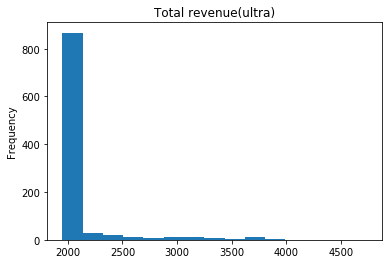

In [57]:
data[data['tariff'] == 'ultra']['total_revenue'].plot(kind='hist', bins=15, title="Total revenue(ultra)")

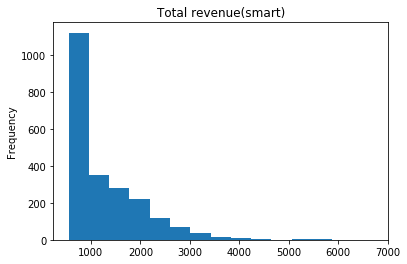

In [58]:
data[data['tariff'] == 'smart']['total_revenue'].plot(kind='hist', bins=15, title="Total revenue(smart)")

Исходя из этих диаграмм можно сделать вывод, что клиентам с тарифным планом "Smart" не всегда хватает стартовых условий и поэтому они зачастую "вылазят" из них. У диаграммы по тарифному плану "Ultra" диаграмма же менее шероховатая, зачастую они укладываются в стартовый пак по условиям тарифа. Высчитав стандартное отклонение можно увидеть, что степень разброса величины по тарифу "Smart" значительно выше (785), чем по тарифу "Ultra" (354).

In [59]:
#Посмтроим таблицу со средними значениями по тарифам по длительности ежемесячных разговоров(в минутах)
data.groupby('tariff').agg({'month_calls_duration':['median','mean','var']})

month_calls_duration                           
                     median        mean            var
tariff                                                
smart                 422.0  417.934948   36219.315784
ultra                 518.0  526.623350  100873.633397

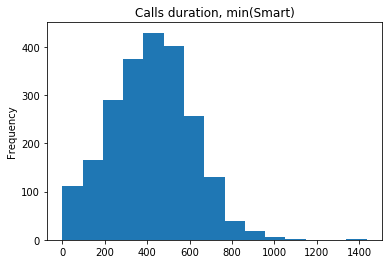

In [60]:
data[data['tariff'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=15, title="Calls duration, min(Smart)")

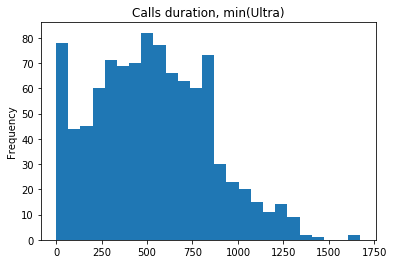

In [61]:
data[data['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=25, title="Calls duration, min(Ultra)")

Исходя из этих диаграмм можно понять, что основная часть клиентов с тарифным планом "Smart" придерживаются своего лимита, однако есть немалая часть, кто выходит вне рамок по условиям. Наибольший пик по разговорам приходится на 400-500 минут. Если же учитывать клиентов с тарифным планом "Ultra", то тут всё в пределах условий и даже с большим запасом, почти 50%. Высчитав стандартное отклонение можно увидеть, что степень разброса величины по тарифу "Smart"(190) меньше, чем по тарифу "Ultra"(317)и, даже с учётом этого разброса(который почти вдвое больше от среднего), клиенты не выходят за пределы стартовых условий.

In [62]:
#Посмтроим таблицу со средними значениями по тарифам по использованному интернету(в МБ)
data.groupby('tariff').agg({'mb_total_in_month':['median','mean','var']})

mb_total_in_month                            
                  median          mean           var
tariff                                              
smart           16506.84  16208.386990  3.446250e+07
ultra           19308.01  19468.805208  1.017510e+08

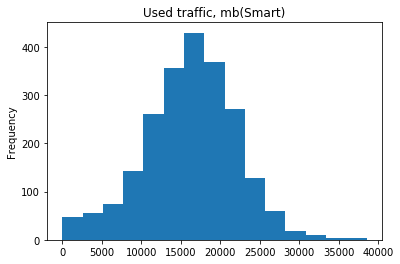

In [63]:
data[data['tariff'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=15, title="Used traffic, mb(Smart)")

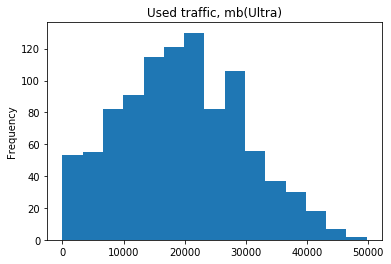

In [64]:
data[data['tariff'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=15, title="Used traffic, mb(Ultra)")

Исходя из построенных диаграмм можно сделать вывод, что основная часть по тарифу "Smart" выходит за пределы тарифного плана(Кстати, распределение Пуассона тоже имеет место быть), но и у клиентов с тарифным планом "Ultra" тоже выход за лимит интернета имеет место быть, однако в меньших количествах. Высчитав стандартное отклонение можно увидеть, что степень разброса величины по тарифу "Smart"(5870) почти вдвое меньше, чем Ultra(10087).

In [65]:
#И так осталась последний параметр - это количество использованных СМС.
data.groupby('tariff').agg({'sms_total_in_month':['median','mean','var']})

sms_total_in_month                        
                   median       mean          var
tariff                                           
smart                28.0  33.384029   796.812958
ultra                38.0  49.363452  2285.266143

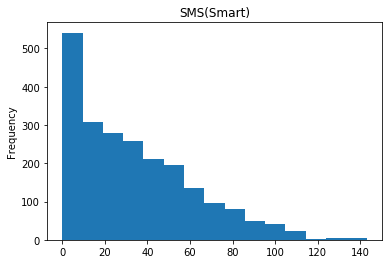

In [66]:
data[data['tariff'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=15, title="SMS(Smart)")

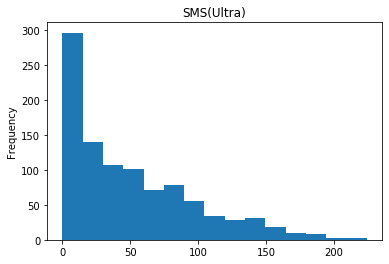

In [67]:
data[data['tariff'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=15, title="SMS(Ultra)")

Поведение пользователей очень похожи, однако видно и тут, что по тарифному плану "Smart" клиенты выходят за пределы бесплатного лимита. По "Ultra" более чем предостаточно. Высчитав стандартное отклонение можно увидеть, что степень разброса величины по тарифу "Smart"(28) также меньше, чем значение "Ultra"(47).

# Проверьте гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
- Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

Т-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
Т.к. сравниваем независимые между собой.

H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается

H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

In [68]:
ultra = data[data['tariff'] == 'ultra']
smart = data[data['tariff'] == 'smart']

In [69]:
#Установим стандартное alpha, как и в тренажёре.
alpha = 0.05

In [70]:
results = st.ttest_ind(ultra['total_revenue'], smart['total_revenue'])

In [71]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3841523297824925e-192
Отвергаем нулевую гипотезу


Разница не случайна, есть значимые различия между выборками

Сформулируем гипотезы:

- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [72]:
data['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [73]:
data['region'] = np.where(data['city'] == 'Москва', 'Москва', 'Другие')

In [74]:
moscow = data[data['region'] == 'Москва']
other = data[data['region'] == 'Другие']

In [75]:
results = st.ttest_ind(moscow['total_revenue'], other['total_revenue'])

In [76]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.46944930844814226
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 47% такой результат может быть получен случайно.

# Результаты исследования

- На тарифном плане Smart прослеживается тенденция к покупке дополнительных функций за счёт того, что в бОльшей части случаев клиентам не хватает условий. Для того,  чтобы удерживать лояльных клиентов, следовало бы предложить тарифные планы(например как Ultra) с лучшими условиями, хоть и бОльшей абонентской платой, чтобы не было оттока клиентов.(Это касательно тех, кто выходит ВНЕ условий).
- Что касается тарифного плана Ultra, то там хорошо подобрано сочетание цена/услуги.
- Тарифные планы рассчитаны в соответствии с потребностями клиентов.
- Необходимо автоматически округлять значения в длительности разговоров в бОльшую сторону.
- Что касаемо средней выручки в Москве и регионах, то тут нельзя однозначно сказать, что есть большая разница. Есть человеческий потенциал, который уже выше не перепрыгнешь(имхо), поэтому тут уже влияет не полностью заработная плата(доходы) человека, а то, сколько он может физически потратить времени в разговорах/интернете.